In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from reviews import *


In [6]:
df = pd.read_csv('Fraud Detection Dataset.csv')

In [7]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [8]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [9]:
df.tail()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0
50999,T13665,2315,814.72,POS Payment,3.0,Tablet,Los Angeles,0,50,10,Invalid Method,0


In [10]:
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [12]:
print(df.dtypes)

Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object


In [13]:
print(df.isnull().sum())

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64


In [16]:
print(df.isnull().sum())

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64


In [17]:
df.drop_duplicates()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50964,T44427,1830,4187.49,Bank Transfer,4.0,Mobile,Chicago,2,67,13,NaN,0
50975,T44680,4877,1826.49,POS Payment,10.0,Desktop,Houston,1,91,4,Net Banking,0
50985,T39758,2029,544.53,Bank Transfer,14.0,Unknown Device,Chicago,4,59,12,Debit Card,0
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0


In [18]:
print(df.columns)

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Device_Used', 'Location',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent'],
      dtype='object')


<h3> 1. Fraud Distribution (Target Variable) </h3>
- Shows the imbalance between fraudulent and non-fraudulent transactions.

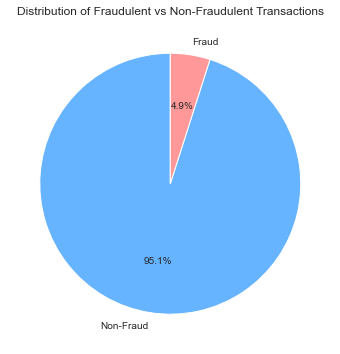

In [21]:
plt.figure(figsize=(8, 6))
fraud_counts = df['Fraudulent'].value_counts()
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', 
        colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

<h3>2. Transaction Amount Distribution by Fraud Status </h3>
- Fraudulent transactions tend to have different amount distributions.

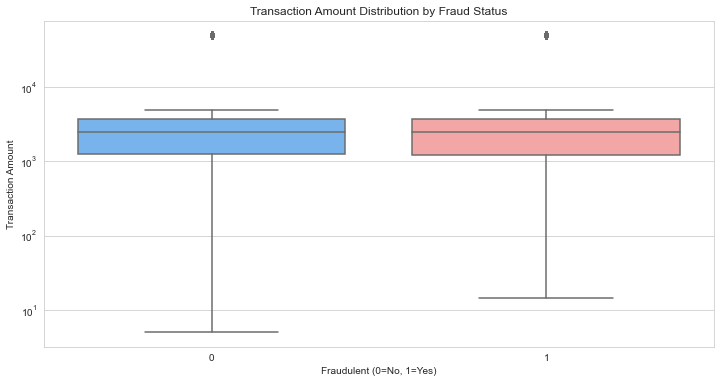

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=df, palette=['#66b3ff','#ff9999'])
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Fraudulent (0=No, 1=Yes)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Using log scale due to wide range
plt.show()

<h3> 3. Transaction Types by Fraud Status</h3>
- Certain transaction types may be more prone to fraud.

<Figure size 864x432 with 0 Axes>

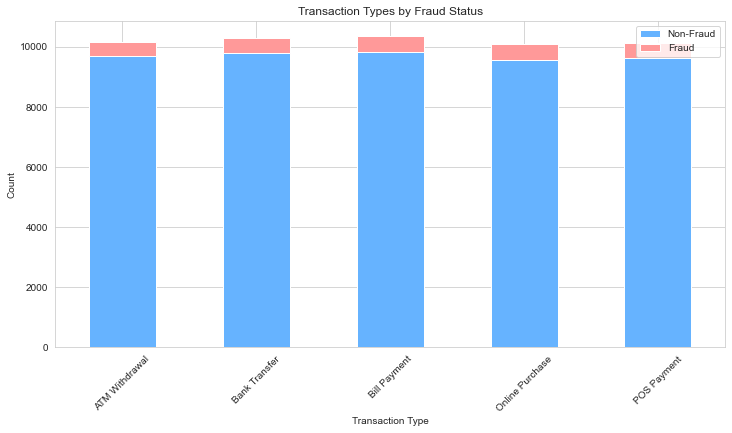

In [24]:
plt.figure(figsize=(12, 6))
transaction_type_fraud = pd.crosstab(df['Transaction_Type'], df['Fraudulent'])
transaction_type_fraud.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999'])
plt.title('Transaction Types by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

<h3> 4. Payment Methods by Fraud Status </h3>
- Some payment methods show higher fraud rates.

<Figure size 864x432 with 0 Axes>

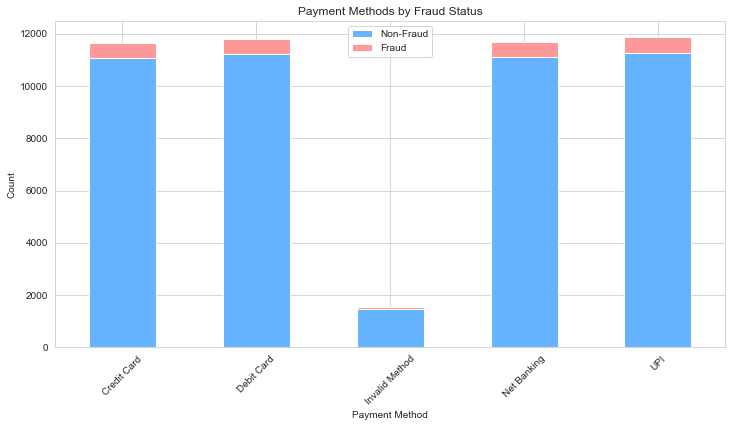

In [25]:
plt.figure(figsize=(12, 6))
payment_method_fraud = pd.crosstab(df['Payment_Method'], df['Fraudulent'])
payment_method_fraud.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999'])
plt.title('Payment Methods by Fraud Status')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

<h3>5. Time of Day vs Fraud </h3>
- Fraudulent transactions may cluster at specific times.

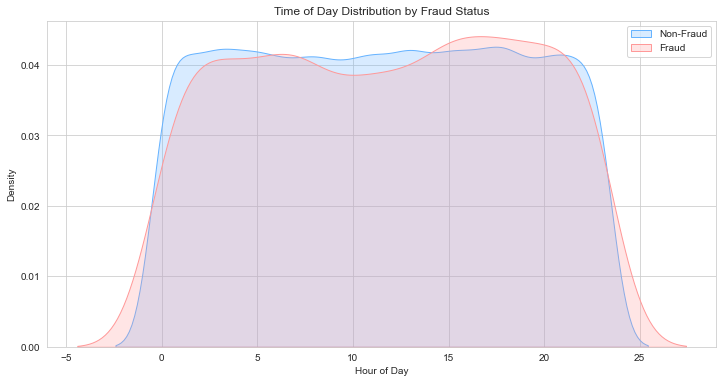

In [26]:

plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Fraudulent'] == 0]['Time_of_Transaction'], 
            label='Non-Fraud', color='#66b3ff', fill=True)
sns.kdeplot(df[df['Fraudulent'] == 1]['Time_of_Transaction'], 
            label='Fraud', color='#ff9999', fill=True)
plt.title('Time of Day Distribution by Fraud Status')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.legend()
plt.show()

<h3>6. Device Used by Fraud Status</h3>
- Certain devices may be associated with higher fraud rates.

<Figure size 864x432 with 0 Axes>

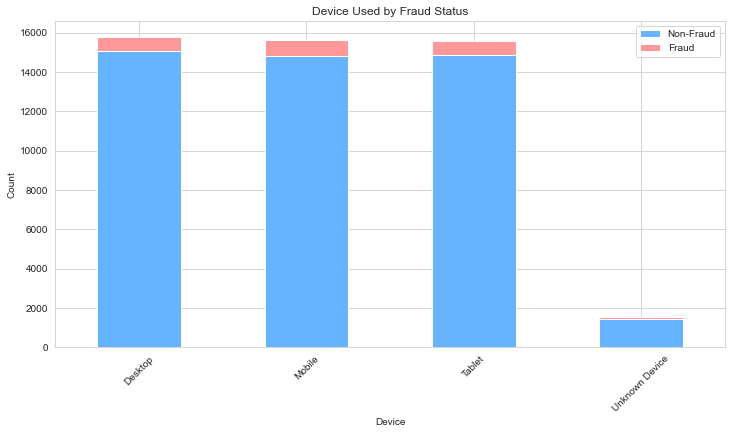

In [27]:
plt.figure(figsize=(12, 6))
device_fraud = pd.crosstab(df['Device_Used'], df['Fraudulent'])
device_fraud.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999'])
plt.title('Device Used by Fraud Status')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()


<h3>7. Location by Fraud Status (Top 10)</h3>
- Some locations have higher fraud incidence.

<Figure size 864x432 with 0 Axes>

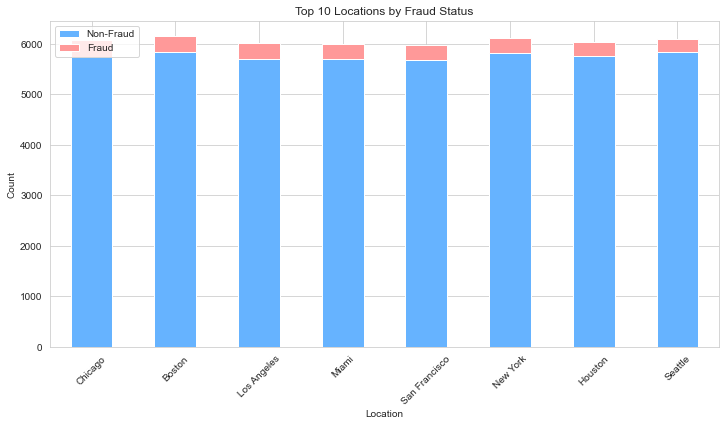

In [28]:
plt.figure(figsize=(12, 6))
location_fraud = pd.crosstab(df['Location'], df['Fraudulent'])
location_fraud = location_fraud.sort_values(by=1, ascending=False).head(10)
location_fraud.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999'])
plt.title('Top 10 Locations by Fraud Status')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

<h3>8. Previous Fraudulent Transactions vs Current Fraud</h3>
- Customers with previous fraud incidents are more likely to commit fraud again.

<Figure size 864x432 with 0 Axes>

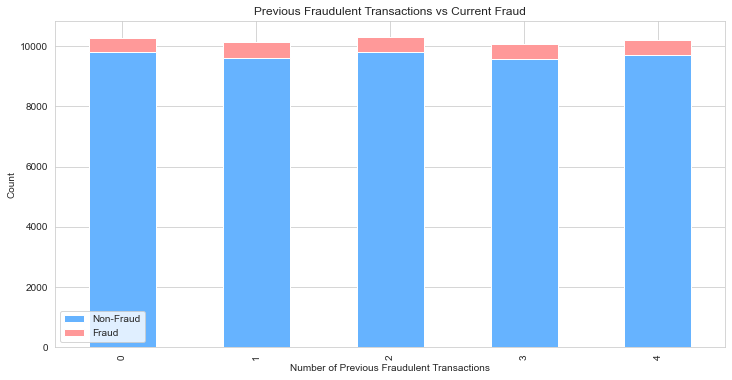

In [29]:
plt.figure(figsize=(12, 6))
prev_fraud = pd.crosstab(df['Previous_Fraudulent_Transactions'], df['Fraudulent'])
prev_fraud.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999'])
plt.title('Previous Fraudulent Transactions vs Current Fraud')
plt.xlabel('Number of Previous Fraudulent Transactions')
plt.ylabel('Count')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

<h3>9. Account Age vs Fraud Status</h3>
- Newer accounts may be more prone to fraud.

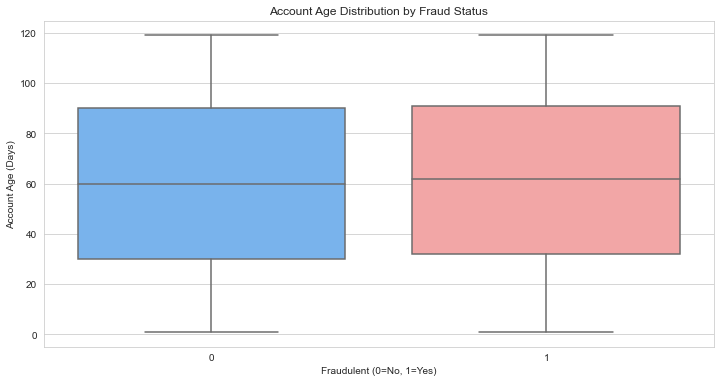

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraudulent', y='Account_Age', data=df, palette=['#66b3ff','#ff9999'])
plt.title('Account Age Distribution by Fraud Status')
plt.xlabel('Fraudulent (0=No, 1=Yes)')
plt.ylabel('Account Age (Days)')
plt.show()

<h3>10. Transactions in Last 24 Hours vs Fraud Status</h3>
- High transaction frequency may correlate with fraud.


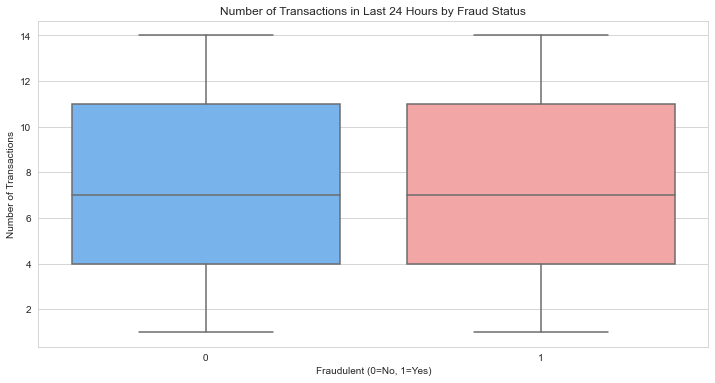

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fraudulent', y='Number_of_Transactions_Last_24H', data=df, palette=['#66b3ff','#ff9999'])
plt.title('Number of Transactions in Last 24 Hours by Fraud Status')
plt.xlabel('Fraudulent (0=No, 1=Yes)')
plt.ylabel('Number of Transactions')
plt.show()

<h3>11. Correlation Heatmap</h3>
- Shows relationships between numerical features.

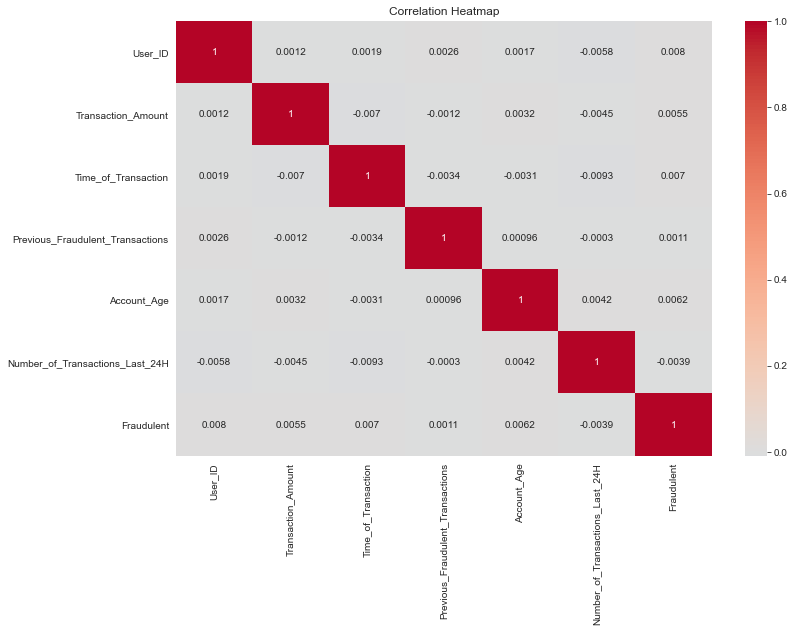

In [33]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

<h3>12. Fraud Rate by Transaction Type</h3>
- Breakdown by transaction type


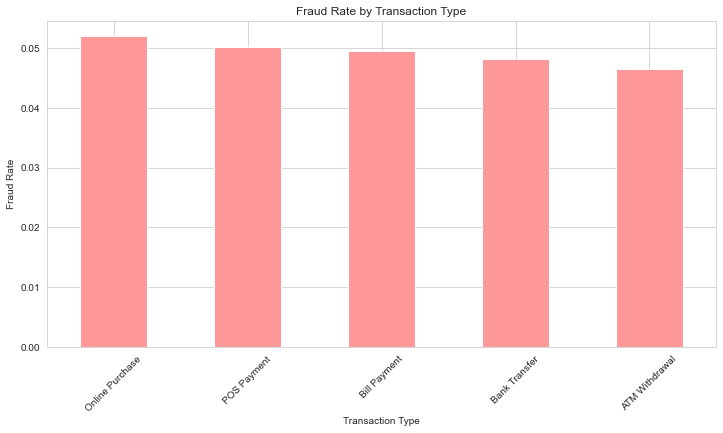

In [34]:
plt.figure(figsize=(12, 6))
fraud_rate = df.groupby('Transaction_Type')['Fraudulent'].mean().sort_values(ascending=False)
fraud_rate.plot(kind='bar', color='#ff9999')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

<h3>13. Fraud Rate by Payment Method</h3>
- Breakdown by payment method

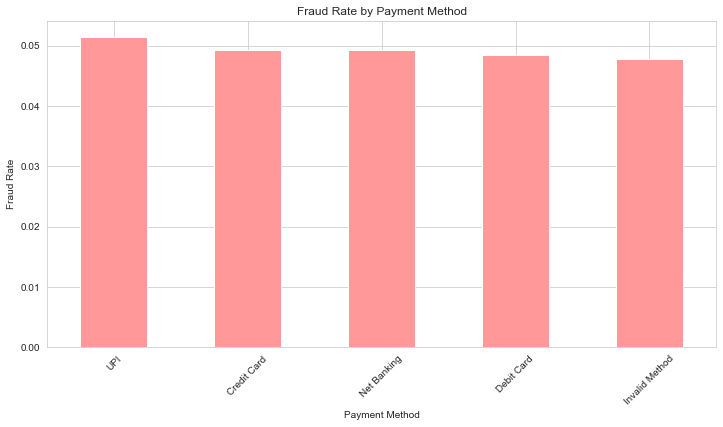

In [35]:
plt.figure(figsize=(12, 6))
fraud_rate_payment = df.groupby('Payment_Method')['Fraudulent'].mean().sort_values(ascending=False)
fraud_rate_payment.plot(kind='bar', color='#ff9999')
plt.title('Fraud Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

<h3>14. Fraud Rate by Device Used</h3>
- Breakdown by device used

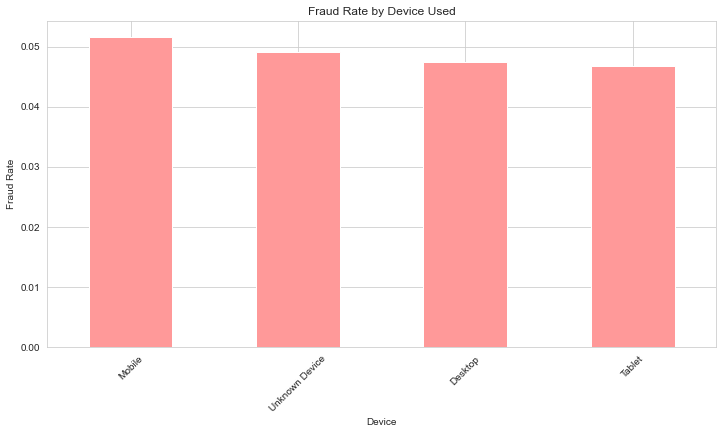

In [36]:
plt.figure(figsize=(12, 6))
fraud_rate_device = df.groupby('Device_Used')['Fraudulent'].mean().sort_values(ascending=False)
fraud_rate_device.plot(kind='bar', color='#ff9999')
plt.title('Fraud Rate by Device Used')
plt.xlabel('Device')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

<h3>15. Transaction Amount vs Account Age by Fraud Status</h3>
-  Relationship between transaction amount and account age.

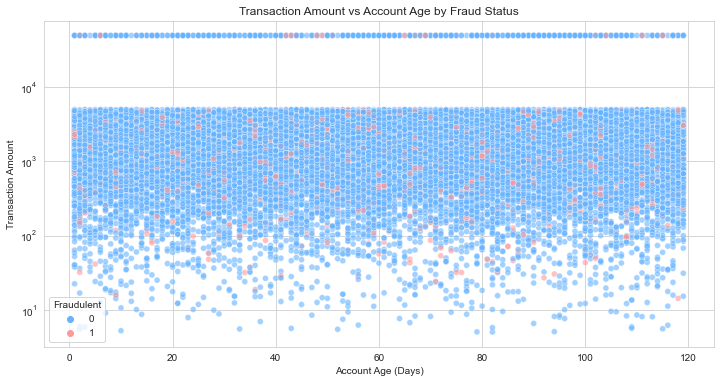

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Account_Age', y='Transaction_Amount', hue='Fraudulent', 
                data=df, palette=['#66b3ff','#ff9999'], alpha=0.6)
plt.title('Transaction Amount vs Account Age by Fraud Status')
plt.xlabel('Account Age (Days)')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.legend(title='Fraudulent')
plt.show()

<h3>16. Hourly Fraud Rate</h3>
- Time patterns in fraudulent activity.

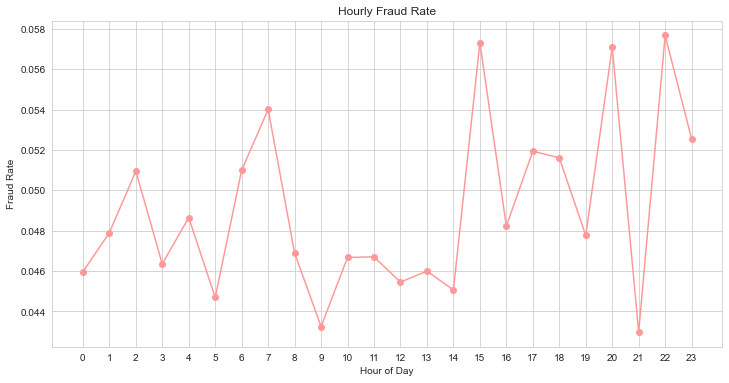

In [38]:
plt.figure(figsize=(12, 6))
hourly_fraud = df.groupby('Time_of_Transaction')['Fraudulent'].mean()
hourly_fraud.plot(kind='line', marker='o', color='#ff9999')
plt.title('Hourly Fraud Rate')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

<h3>17. Transaction Amount Distribution by Transaction Type</h3>
- How transaction amounts vary by type.

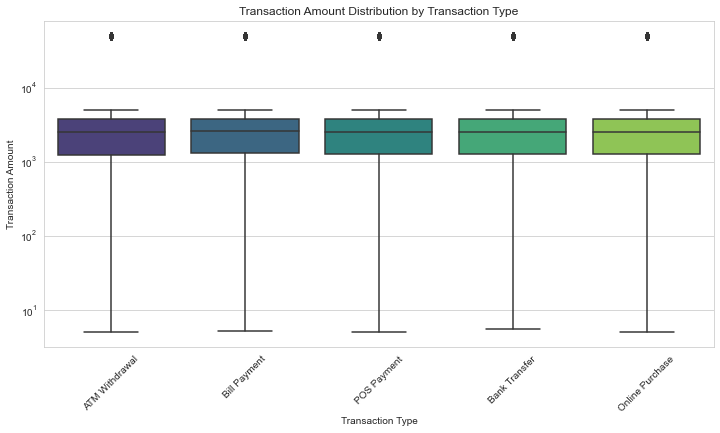

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transaction_Type', y='Transaction_Amount', data=df, palette='viridis')
plt.title('Transaction Amount Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

<h3>18. Fraud Rate by Number of Previous Fraudulent Transactions</h3>
- How previous fraud and recent activity relate to fraud.

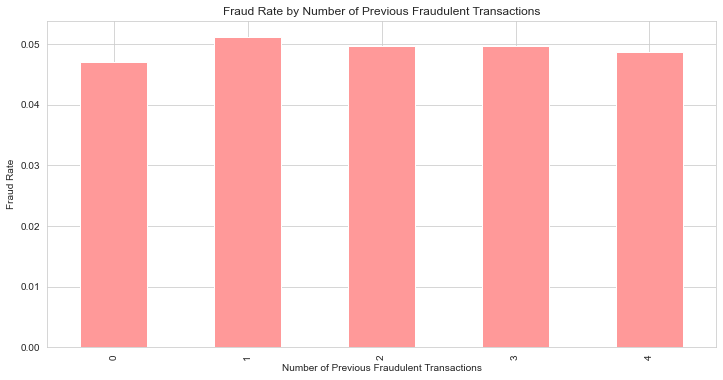

In [41]:
plt.figure(figsize=(12, 6))
fraud_rate_prev = df.groupby('Previous_Fraudulent_Transactions')['Fraudulent'].mean()
fraud_rate_prev.plot(kind='bar', color='#ff9999')
plt.title('Fraud Rate by Number of Previous Fraudulent Transactions')
plt.xlabel('Number of Previous Fraudulent Transactions')
plt.ylabel('Fraud Rate')
plt.show()

<h3>19. Fraud Rate by Number of Transactions in Last 24 Hours</h3>


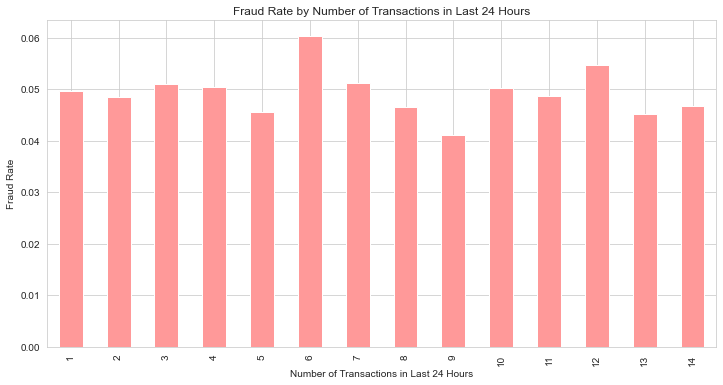

In [42]:
plt.figure(figsize=(12, 6))
fraud_rate_24h = df.groupby('Number_of_Transactions_Last_24H')['Fraudulent'].mean()
fraud_rate_24h.plot(kind='bar', color='#ff9999')
plt.title('Fraud Rate by Number of Transactions in Last 24 Hours')
plt.xlabel('Number of Transactions in Last 24 Hours')
plt.ylabel('Fraud Rate')
plt.show()

<h3>20. Pairplot of Numerical Features (Sample)</h3>
- Relationships between numerical features.

<Figure size 864x432 with 0 Axes>

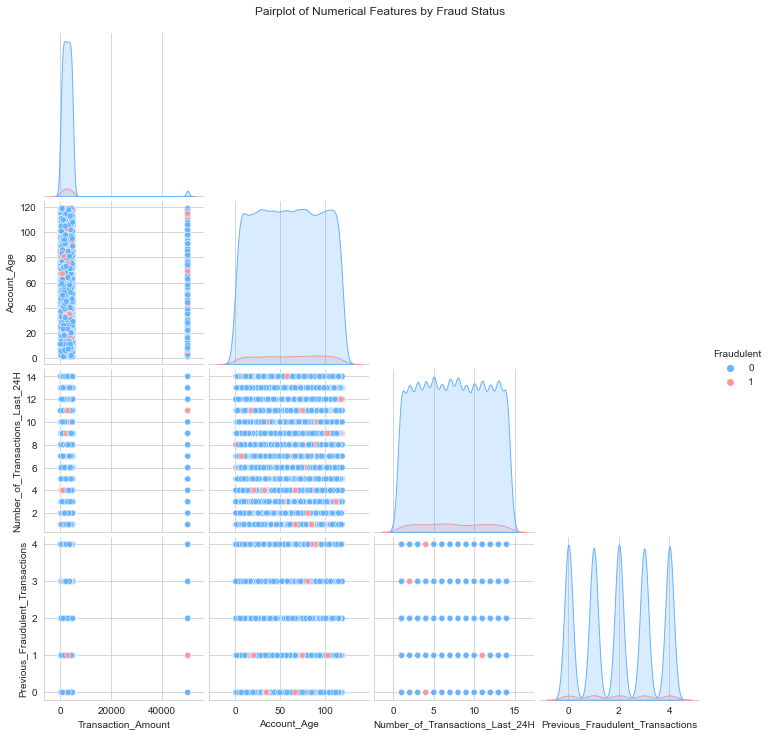

In [43]:
plt.figure(figsize=(12, 6))
numerical_features = ['Transaction_Amount', 'Account_Age', 'Number_of_Transactions_Last_24H', 'Previous_Fraudulent_Transactions']
sns.pairplot(df[numerical_features + ['Fraudulent']], hue='Fraudulent', 
             palette={0: '#66b3ff', 1: '#ff9999'}, corner=True)
plt.suptitle('Pairplot of Numerical Features by Fraud Status', y=1.02)
plt.show()